In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
yeast_comb = pandas.read_excel('../data/yeast/processed/ho2018_processed.xlsx')

In [3]:
yeast_db = pandas.read_excel('../data/yeast/yeast_db_full.xlsx')

C:\Users\Dynev\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
yeast_dbr = pandas.read_excel('../data/yeast/yeast_db_ribo.xlsx')

In [5]:
yeast_comb.head()

,Systematic Name,Standard Name,PENG,KUL,LAW,LAHT,DGD,LEE2,THAK,NAG,Entry,Ribosomal,Mass
0,Q0045,COX1,3651.0,735.108983,NaN,NaN,55426000.0,NaN,2900000.0,1.035893e+09,P00401,False,58798
1,Q0050,AI1,234.0,21.907142,NaN,NaN,4813500.0,NaN,NaN,5.973500e+07,P03875,False,96079
2,Q0055,AI2,271.0,5.425417,NaN,NaN,7553800.0,NaN,NaN,NaN,P03876,False,98008
3,Q0060,AI3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P03877,False,47917
4,Q0065,AI4,197.0,58.683181,NaN,NaN,NaN,NaN,NaN,NaN,P03878,False,63311


In [24]:
yeast_comb['Mass'] = yeast_comb['Entry'].map(yeast_db.set_index('Entry')['Mass'])

In [36]:
yeast_comb['Mass'] = yeast_comb['Mass'].str.replace(',', '').astype(float)

In [6]:
yeast_comb.fillna(0, inplace = True)

In [7]:
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    print(sum(yeast_comb[i]))

53108713.0
53741009.74229979
67830797.02660966
95205972.5132143


In [13]:
total_quant_proteins = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    total_quant_proteins.append(len(yeast_comb[yeast_comb[i] != 0]))
    
total_quant_proteins

[4397, 4597, 1214, 1786]

In [8]:
yeast_core = yeast_comb.loc[~(yeast_comb.loc[:,['PENG', 'KUL', 'LAW', 'LAHT']]==0.0).any(axis=1)]

In [9]:
yeast_core

,Systematic Name,Standard Name,PENG,KUL,LAW,LAHT,DGD,LEE2,THAK,NAG,Entry,Ribosomal,Mass
31,YAL012W,YBL029W,38516.0,48716.926670,117031.965100,175294.490410,3.970800e+10,7.656098e+07,3.000000e+08,1.655288e+10,P31373,False,42542
33,YAL014C,YBL039W-B,2395.0,1022.097642,874.575222,1500.294212,5.993300e+07,0.000000e+00,1.133333e+06,2.056657e+08,P31377,False,29049
35,YAL016W,YBL055C,14963.0,5504.634304,8854.470602,11230.307260,2.162600e+09,9.452742e+06,3.266667e+07,7.752867e+09,P31383,False,70907
40,YAL021C,YBL111C,4770.0,1476.953334,4957.277791,7928.765971,1.229000e+09,3.982266e+06,5.566667e+06,3.136500e+09,P31384,False,94670
55,YAL035W,YBR137W,11570.0,13234.726440,9689.162658,5512.604811,1.446400e+10,7.375261e+07,1.533333e+08,1.799700e+10,P39730,False,112268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,YPR148C,YPR148C,18435.0,5990.202613,16714.749360,2564.493288,4.209600e+09,5.777714e+06,3.066667e+07,8.052517e+09,Q06523,False,49279
5706,YPR165W,RHO1,14656.0,25131.846940,7103.578252,117660.392681,2.923400e+09,4.123845e+06,3.800000e+07,5.972050e+09,P06780,False,23152
5708,YPR167C,MET16,3838.0,50.109977,4209.796583,18514.159872,5.556800e+07,0.000000e+00,7.653333e+05,2.003863e+09,P18408,False,30380
5721,YPR181C,SEC23,11736.0,7023.694157,7765.459626,24925.266925,7.017800e+08,2.868527e+07,5.596667e+07,9.678850e+09,P15303,False,85385


In [14]:
def milo(Cp: float, Mavg: float):
    return 6*(10**11) * Cp / Mavg

In [17]:
cn_per_vol_m = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    cn_per_vol_m.append(milo(0.117, sum(yeast_comb[i]*yeast_comb['Mass'])/sum(yeast_comb[i])))

cn_per_vol_m

[1816314.8107730832, 1957762.0057345764, 2010633.4572864447, 1783994.586615982]

In [18]:
m_avg = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    m_avg.append(sum(yeast_comb[i]*yeast_comb['Mass'])/sum(yeast_comb[i]))

m_avg

[38649.68758919087, 35857.269573305515, 34914.36977018281, 39349.89518839334]

In [21]:
def quantify_ribosome_prots(ribo: pandas.Series):
    global yeast_dbr
    ribo_quants = []
    for i in range(max(yeast_dbr['Part'].tolist())):
        ribo_quants.append(ribo[ribo.index.isin(yeast_dbr[yeast_dbr['Part'] == i+1]['Entry'].tolist())].tolist())
    return numpy.array(ribo_quants)

In [33]:
ribo_quants_raw = []
ribo_quants_proc = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    ribo_quants_raw.append(yeast_comb[yeast_comb['Ribosomal'] == 1][i].to_numpy())
    ribo_quants_proc.append(quantify_ribosome_prots(yeast_comb[yeast_comb['Ribosomal'] == 1].set_index('Entry')[i]))

In [34]:
ribo_quants_raw + ribo_quants_proc

[array([     0.,      0.,      0.,  45288.,  64318.,      0.,      0.,
             0.,  70257.,      0., 145066.,  44527.,      0., 422559.,
         53694.,      0., 231345.,      0.,      0.,      0.,      0.,
         64196.,      0.,  73487., 737125.,      0.,      0.,      0.,
             0.,  21159.,      0.,      0.,      0.,      0.,      0.,
         60177.,  73896.,      0.,      0., 178056.,  28809., 100125.,
        110178.,  46927.,      0.,  50091.,  46772.,  27336.,  44647.,
         96684.,      0.,  25652.,  47244.,  48443., 127120., 113252.,
         52658.,  80749.,      0.,      0.,      0.,      0.,      0.,
         75883.,      0., 339488.,  63083.,      0.,      0., 111548.,
             0.,  45562.,      0.,  48304.,      0.,  63760., 339538.,
             0., 116899.,  29263.,  49410., 187821.,  51754.,  61208.,
         30993., 127228.,      0., 206374.,  25533.,  48006.,  41582.,
             0.,  23045.,      0.,  72403.,  77675.,      0.,      0.,
      

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (78,) + inhomogeneous part.

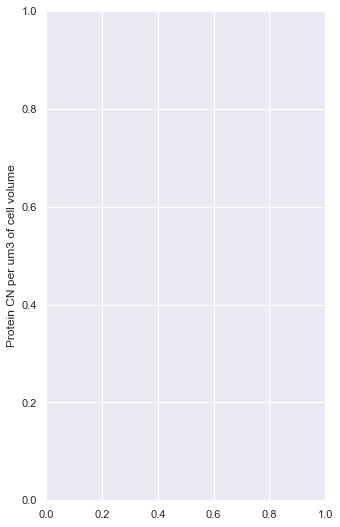

In [36]:
plt.figure(figsize=(5,9))
plt.ylabel('Protein CN per um3 of cell volume')
seaborn.boxplot(data=ribo_quants_raw + ribo_quants_proc, color=seaborn.color_palette('deep')[0], fliersize=0, showmeans = True, meanprops={'markerfacecolor':seaborn.color_palette('deep')[1],
                                                                                                                    'markeredgecolor':seaborn.color_palette('deep')[1],
                                                                                                                   'markersize':8})
seaborn.stripplot(data=ribo_quants_raw + ribo_quants_proc, color=seaborn.color_palette('deep')[2], s=4, zorder=1)

In [55]:
test2 = quantify_ribosome_prots(yeast_comb[yeast_comb['Ribosomal'] == 1].set_index('Entry')['yeast2'])

In [56]:
test_collapsed2 = [numpy.mean(x) for x in test2 if x]

In [57]:
test_collapsed2 = [x for x in test_collapsed2 if x > 0]

In [58]:
test_collapsed2

[81484.0,
 70847.5,
 35919.0,
 77063.0,
 93179.0,
 41889.0,
 283012.5,
 145198.0,
 116506.5,
 228480.5,
 53120.0,
 51236.5,
 462634.0,
 160743.0,
 72504.5,
 64665.0,
 98418.0,
 43295.0,
 45635.0,
 56687.0,
 115035.0,
 49059.0,
 8297.5,
 65305.5,
 32566.0,
 89991.0,
 197340.0,
 260044.5,
 57518.0,
 103673.0,
 78455.0,
 135823.0,
 61470.0,
 45884.0,
 60702.0,
 49429.0,
 158996.0,
 111981.0,
 12445.5,
 29697.5,
 27209.0,
 78252.5,
 39034.0,
 43280.0,
 159062.5,
 49862.0,
 20246.0,
 71266.0,
 135557.0,
 233131.0]

In [22]:
cn_per_vol_n1 = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT']:
    cn_per_vol_n1.append(sum(yeast_comb[i] * 187000/max(yeast_comb[yeast_comb['Ribosomal']][i])))
    
cn_per_vol_n1

[13473059.970832609, 23882705.875133883, 5351237.530082532, 15893186.228437765]

In [23]:
yeast_comb[yeast_comb['Ribosomal']]['PENG']

135         0.0
179         0.0
191         0.0
197     45288.0
243     64318.0
         ...   
5497        0.0
5526    67047.0
5598        0.0
5648    97523.0
5675        0.0
Name: PENG, Length: 138, dtype: float64

In [64]:
cn_per_vol_n1 = []
for i in ['PENG', 'KUL', 'LAW', 'LAHT', 'DGD', 'LEE2', 'THAK', 'NAG']:
    cn_per_vol_n1.append(sum(yeast_comb[i] * 200000/numpy.mean(yeast_comb[yeast_comb['Ribosomal']][i])))
    
cn_per_vol_n1

[175962071.38670203,
 89426397.33457662,
 68142330.62167938,
 165171155.45231998,
 155819010.87076387,
 139641518.56245157,
 97963239.01831761,
 194843893.31044552]

In [61]:
cn_per_vol_n1 = []
for i in [1, 2]:
    cn_per_vol_n1.append(sum(yeast_comb[f'yeast{i}'] * 200000/numpy.mean([test_collapsed, test_collapsed2][i-1])))
    
cn_per_vol_n1

[68970118.22117357, 104013415.64110135]

In [35]:
yeast_comb2

,Entry,Status,Ribosomal,yeast1,yeast2,yeast3,yeast4,yeast5
0,P05755,1,1,1659.98790,84252.0,6.762100e+08,1.030000e+11,1.457806e+08
1,O13516,1,1,92949.36896,78716.0,4.570000e+10,9.141600e+08,8.013217e+05
2,P0CX40,1,1,0.00000,0.0,0.000000e+00,0.000000e+00,2.469808e+08
3,P48164,1,1,185692.71030,132988.0,0.000000e+00,7.630000e+10,9.104470e+07
4,P26786,1,1,300803.98570,100025.0,0.000000e+00,6.740000e+10,1.199530e+08
...,...,...,...,...,...,...,...,...
4924,P32375,1,0,0.00000,0.0,0.000000e+00,0.000000e+00,3.550422e+05
4925,Q04711,1,0,0.00000,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4926,P24867,1,0,0.00000,0.0,0.000000e+00,0.000000e+00,1.681004e+05
4927,Q08550,1,0,0.00000,0.0,0.000000e+00,0.000000e+00,2.180013e+06


In [66]:
yeast_comb_r2 = yeast_comb2[yeast_comb2['Ribosomal'] == 1]

In [42]:
yeast_comb_r2.sort_values(by = 'yeast2', ascending = False)

,Entry,Status,Ribosomal,yeast1,yeast2,yeast3,yeast4,yeast5
177,P02400,1,1,279408.8524,488024.0,1.270000e+10,4.550000e+10,8.190184e+07
45,P05319,1,1,420788.5352,437244.0,1.070000e+10,2.890000e+10,4.800051e+07
37,P06367,1,1,0.0000,285634.0,0.000000e+00,0.000000e+00,0.000000e+00
36,P39516,1,1,0.0000,280391.0,4.400900e+07,0.000000e+00,8.610729e+07
13,P0C0X0,1,1,0.0000,260952.0,0.000000e+00,1.050000e+10,0.000000e+00
...,...,...,...,...,...,...,...,...
82,P0CX46,1,1,0.0000,0.0,0.000000e+00,0.000000e+00,1.681091e+08
79,P0C2H8,1,1,273991.0503,0.0,0.000000e+00,9.180000e+10,5.133010e+06
78,P0C2H9,1,1,20568.5868,0.0,0.000000e+00,2.750000e+10,2.216011e+06
74,P87262,1,1,0.0000,0.0,0.000000e+00,1.210000e+10,0.000000e+00


In [70]:
ribo_quants = []
for i in ['yeast1', 'yeast2']:
    ribo_quants.append(yeast_comb_r2[yeast_comb_r2[i] != 0].set_index('Entry')[i])

In [71]:
ribo_quants[0]

Entry
P05755      1659.987900
O13516     92949.368960
P48164    185692.710300
P26786    300803.985700
P26783    126213.717700
              ...      
Q04599       700.911465
Q06090      1030.947604
Q06630       647.897477
Q06678       993.829379
Q12487      1048.143686
Name: yeast1, Length: 147, dtype: float64

In [25]:
seaborn.set()

<AxesSubplot:ylabel='Protein CN per um3 of cell volume'>

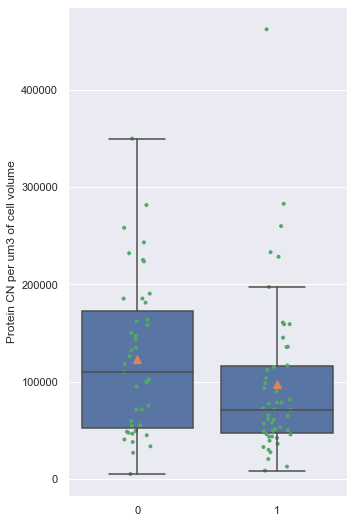

In [59]:
plt.figure(figsize=(5,9))
plt.ylabel('Protein CN per um3 of cell volume')
seaborn.boxplot(data=[test_collapsed, test_collapsed2], color=seaborn.color_palette('deep')[0], fliersize=0, showmeans = True, meanprops={'markerfacecolor':seaborn.color_palette('deep')[1],
                                                                                                                    'markeredgecolor':seaborn.color_palette('deep')[1],
                                                                                                                   'markersize':8})
seaborn.stripplot(data=[test_collapsed, test_collapsed2], color=seaborn.color_palette('deep')[2], s=4, zorder=1)
#plt.savefig('../graphs/ecoli_ribo_final_2.png', dpi=300, bbox_inches='tight')